In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read our datasets

train=pd.read_csv('/content/train.csv')
test=pd.read_csv("/content/test (4).csv")

campaign_data=pd.read_csv("/content/campaign_data.csv")
coupon_item_map=pd.read_csv("/content/coupon_item_mapping.csv")
customer_demo=pd.read_csv("/content/customer_demographics.csv")
customer_transaction=pd.read_csv("/content/customer_transaction_data.csv")
item_data=pd.read_csv("/content/item_data.csv")


In [4]:
#let's have a look at all our provided datasets
print(train.head())
print(train.shape)

   id  campaign_id  coupon_id  customer_id  redemption_status
0   1           13         27         1053                  0
1   2           13        116           48                  0
2   6            9        635          205                  0
3   7           13        644         1050                  0
4   9            8       1017         1489                  0
(78369, 5)


In [5]:
print(campaign_data.head())
print(campaign_data.shape)

   campaign_id campaign_type start_date  end_date
0           24             Y   21/10/13  20/12/13
1           25             Y   21/10/13  22/11/13
2           20             Y   07/09/13  16/11/13
3           23             Y   08/10/13  15/11/13
4           21             Y   16/09/13  18/10/13
(28, 4)


In [6]:
print(coupon_item_map.head())
print(coupon_item_map.shape)

   coupon_id  item_id
0        105       37
1        107       75
2        494       76
3        522       77
4        518       77
(92663, 2)


In [7]:
print(customer_demo.head())
print(customer_demo.shape)

   customer_id age_range  ... no_of_children  income_bracket
0            1       70+  ...            NaN               4
1            6     46-55  ...            NaN               5
2            7     26-35  ...              1               3
3            8     26-35  ...              2               6
4           10     46-55  ...            NaN               5

[5 rows x 7 columns]
(760, 7)


In [8]:
print(customer_transaction.head())
print(customer_transaction.shape)

         date  customer_id  ...  other_discount  coupon_discount
0  2012-01-02         1501  ...          -10.69              0.0
1  2012-01-02         1501  ...          -13.89              0.0
2  2012-01-02         1501  ...          -14.25              0.0
3  2012-01-02         1501  ...            0.00              0.0
4  2012-01-02         1501  ...          -28.14              0.0

[5 rows x 7 columns]
(296208, 7)


In [9]:
print(item_data.head())
print(item_data.shape)

   item_id  brand   brand_type       category
0        1      1  Established        Grocery
1        2      1  Established  Miscellaneous
2        3     56        Local         Bakery
3        4     56        Local        Grocery
4        5     56        Local        Grocery
(74066, 4)


In [10]:
print(test.head())
print(test.shape)

   id  campaign_id  coupon_id  customer_id
0   3           22        869          967
1   4           20        389         1566
2   5           22        981          510
3   8           25       1069          361
4  10           17        498          811
(50226, 4)


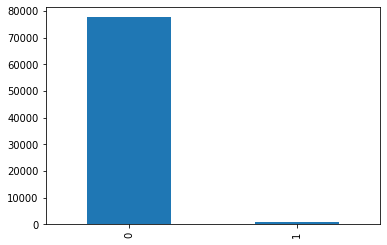

In [11]:
#let's see the count of the redemption status
train['redemption_status'].value_counts().plot.bar()

We can see that the number of redemeed coupons are very less

In [12]:
#function for creating a short summary for our various dataframes
def summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary
    

In [13]:
summary(train)

Dataset Shape: (78369, 5)


,Name,dtypes,Missing,Uniques
0,id,int64,0,78369
1,campaign_id,int64,0,18
2,coupon_id,int64,0,866
3,customer_id,int64,0,1428
4,redemption_status,int64,0,2


In [14]:
#joining our test and train datasets
train['is_train']  = 1
test['redemption_status'] = -99
test['is_train'] = 0
full=train.append(test)

In [15]:
full.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train
0,1,13,27,1053,0,1
1,2,13,116,48,0,1
2,6,9,635,205,0,1
3,7,13,644,1050,0,1
4,9,8,1017,1489,0,1


In [16]:
full.shape

(128595, 6)

In [17]:
#we merge our campaign dataset and the full dataset using left join on the campaign id as campaign id is common between them
full=pd.merge(full, campaign_data, on="campaign_id", how='left')
full.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train,campaign_type,start_date,end_date
0,1,13,27,1053,0,1,X,19/05/13,05/07/13
1,2,13,116,48,0,1,X,19/05/13,05/07/13
2,6,9,635,205,0,1,Y,11/03/13,12/04/13
3,7,13,644,1050,0,1,X,19/05/13,05/07/13
4,9,8,1017,1489,0,1,X,16/02/13,05/04/13


In [18]:
full.shape

(128595, 9)

In [19]:
summary(full)

Dataset Shape: (128595, 9)


,Name,dtypes,Missing,Uniques
0,id,int64,0,128595
1,campaign_id,int64,0,28
2,coupon_id,int64,0,1116
3,customer_id,int64,0,1582
4,redemption_status,int64,0,3
5,is_train,int64,0,2
6,campaign_type,object,0,2
7,start_date,object,0,25
8,end_date,object,0,26


## ITEM DATA AND COUPON ITEM MAPPING

In [20]:
summary(item_data)

Dataset Shape: (74066, 4)


,Name,dtypes,Missing,Uniques
0,item_id,int64,0,74066
1,brand,int64,0,5528
2,brand_type,object,0,2
3,category,object,0,19


In [21]:
summary(coupon_item_map)

Dataset Shape: (92663, 2)


,Name,dtypes,Missing,Uniques
0,coupon_id,int64,0,1116
1,item_id,int64,0,36289


In [22]:
for j in ['brand', 'brand_type', 'category']:
    item_data[j]=item_data[j].astype('category')
    
coupon_item_map=coupon_item_map.merge(item_data,on='item_id',how='left')
coupon_item_map.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [23]:
summary(coupon_item_map)

Dataset Shape: (92663, 5)


,Name,dtypes,Missing,Uniques
0,coupon_id,int64,0,1116
1,item_id,int64,0,36289
2,brand,category,0,2555
3,brand_type,category,0,2
4,category,category,0,17


Customer-Transaction

In [24]:
#converting date to date time and determining the day, month and year
customer_transaction['date']=pd.to_datetime(customer_transaction['date'],format='%Y-%m-%d')
customer_transaction['day']=customer_transaction['date'].dt.day.astype('category')
customer_transaction['month']=customer_transaction['date'].dt.month.astype('category')
customer_transaction['year']=customer_transaction['date'].dt.week.astype('category')
customer_transaction.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,month,year
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1


In [25]:
#making new features like marked price, discount percentage and price per quantity
customer_transaction['marked_price']=customer_transaction['selling_price']-customer_transaction['other_discount']-customer_transaction['coupon_discount']
customer_transaction['disc_percent']=(customer_transaction['marked_price']-customer_transaction['selling_price'])/customer_transaction['selling_price']
customer_transaction['price_per_quan']=customer_transaction['marked_price']/customer_transaction['quantity']
customer_transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,month,year,marked_price,disc_percent,price_per_quan
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,45.95,0.303176,45.95
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,67.32,0.259966,67.32
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1,120.75,0.133803,120.75
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1,67.32,0.000000,67.32
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1,99.38,0.395003,99.38


merging customer transaction and coupon item mapping on item id

In [26]:
trans_coupon_item=pd.merge(customer_transaction, coupon_item_map, on=['item_id'], how='left')
trans_coupon_item.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,month,year,marked_price,disc_percent,price_per_quan,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,45.95,0.303176,45.95,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,45.95,0.303176,45.95,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,45.95,0.303176,45.95,29.0,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,67.32,0.259966,67.32,7.0,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,67.32,0.259966,67.32,20.0,56,Local,Natural Products


In [27]:
summary(trans_coupon_item)

Dataset Shape: (590088, 17)


,Name,dtypes,Missing,Uniques
0,date,datetime64[ns],0,176
1,customer_id,int64,0,1579
2,item_id,int64,0,38028
3,quantity,int64,0,2740
4,selling_price,float64,0,2877
5,other_discount,float64,1,883
6,coupon_discount,float64,1,110
7,day,category,0,31
8,month,category,0,6
9,year,category,0,26


In [28]:
trans_coupon_item=trans_coupon_item[trans_coupon_item.duplicated()==False]
summary(trans_coupon_item)

Dataset Shape: (589074, 17)


,Name,dtypes,Missing,Uniques
0,date,datetime64[ns],0,176
1,customer_id,int64,0,1579
2,item_id,int64,0,38028
3,quantity,int64,0,2740
4,selling_price,float64,0,2877
5,other_discount,float64,1,883
6,coupon_discount,float64,1,110
7,day,category,0,31
8,month,category,0,6
9,year,category,0,26


In [31]:
full.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'is_train', 'campaign_type', 'start_date', 'end_date'],
      dtype='object')

In [32]:
#changing start and end date to datetime and retrieving the number of days, week, and months a campaign lasts
full['start_date']=pd.to_datetime(full['start_date'], format='%d/%m/%y')
full['end_date']=pd.to_datetime(full['end_date'], format='%d/%m/%y')

In [33]:
full['diff_d']=(full['end_date']-full['start_date'])/np.timedelta64(1,'D')
full['diff_m']=(full['end_date']-full['start_date'])/np.timedelta64(1,'M')
full['diff_w']=(full['end_date']-full['start_date'])/np.timedelta64(1,'W')

In [34]:
summary(customer_demo)

Dataset Shape: (760, 7)


,Name,dtypes,Missing,Uniques
0,customer_id,int64,0,760
1,age_range,object,0,6
2,marital_status,object,329,2
3,rented,int64,0,2
4,family_size,object,0,5
5,no_of_children,object,538,3
6,income_bracket,int64,0,12


Since the marital status and number of children have many null values, we drop these columns

In [35]:
customer_demo=customer_demo.drop(['marital_status', 'no_of_children'], axis=1)
customer_demo.head()

,customer_id,age_range,rented,family_size,income_bracket
0,1,70+,0,2,4
1,6,46-55,0,2,5
2,7,26-35,0,3,3
3,8,26-35,0,4,6
4,10,46-55,0,1,5


In [36]:
#merging full and customer demo dataset
full=pd.merge(full, customer_demo, on=['customer_id'], how='left')
full.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,age_range,rented,family_size,income_bracket
0,1,13,27,1053,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,46-55,0.0,1,5.0
1,2,13,116,48,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,36-45,0.0,2,3.0
2,6,9,635,205,0,1,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,46-55,0.0,2,7.0
3,7,13,644,1050,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,1,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,46-55,0.0,2,3.0


In [37]:
cust_detail=full[['customer_id', 'age_range', 'rented', 'family_size', 'income_bracket']].drop_duplicates()
cus_mode=cust_detail.drop(['customer_id'], axis=1).mode(axis=0)
cus_mode

,age_range,rented,family_size,income_bracket
0,46-55,0.0,2,5.0


In [38]:
cust_detail=cust_detail.fillna(cus_mode.iloc[0])


In [39]:
full.drop(['age_range', 'rented', 'family_size', 'income_bracket'], axis=1, inplace=True)
full=pd.merge(full, cust_detail, on=['customer_id'], how='left')
full['income_bracket']=full['income_bracket'].apply(lambda x: str(x))
cols=['age_range', 'family_size', 'income_bracket']


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
#encoding age range, rented, family size and income bracket
for i in cols:
    lbl = LabelEncoder()
    lbl.fit(list(full[i].values.astype('str')))
    full[i] = lbl.transform(list(full[i].values.astype('str')))

In [42]:
full.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,age_range,rented,family_size,income_bracket
0,1,13,27,1053,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,3,0.0,0,7
1,2,13,116,48,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,2,0.0,1,5
2,6,9,635,205,0,1,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,3,0.0,1,9
3,7,13,644,1050,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,3,0.0,1,7
4,9,8,1017,1489,0,1,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,3,0.0,1,5


In [43]:
full.columns, trans_coupon_item.columns

(Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
        'is_train', 'campaign_type', 'start_date', 'end_date', 'diff_d',
        'diff_m', 'diff_w', 'age_range', 'rented', 'family_size',
        'income_bracket'],
       dtype='object'),
 Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
        'other_discount', 'coupon_discount', 'day', 'month', 'year',
        'marked_price', 'disc_percent', 'price_per_quan', 'coupon_id', 'brand',
        'brand_type', 'category'],
       dtype='object'))

In [44]:
#creating the full dataframe
df=full.merge(trans_coupon_item, on=['customer_id','coupon_id'],how='left')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,age_range,rented,family_size,income_bracket,date,item_id,quantity,selling_price,other_discount,coupon_discount,day,month,year,marked_price,disc_percent,price_per_quan,brand,brand_type,category
0,1,13,27,1053,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,3,0.0,0,7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,13,116,48,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,2,0.0,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,9,635,205,0,1,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,3,0.0,1,9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,13,644,1050,0,1,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,3,0.0,1,7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,1,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,3,0.0,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.tail()

,id,campaign_id,coupon_id,customer_id,redemption_status,is_train,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,age_range,rented,family_size,income_bracket,date,item_id,quantity,selling_price,other_discount,coupon_discount,day,month,year,marked_price,disc_percent,price_per_quan,brand,brand_type,category
172575,128591,25,596,1336,-99,0,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429,2,0.0,4,11,2012-03-16,11376.0,1.0,89.05,-28.14,0.0,16,3,11,117.19,0.316002,117.19,487,Established,Grocery
172576,128591,25,596,1336,-99,0,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429,2,0.0,4,11,2012-03-29,11376.0,1.0,106.86,-10.33,0.0,29,3,13,117.19,0.096669,117.19,487,Established,Grocery
172577,128591,25,596,1336,-99,0,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429,2,0.0,4,11,2012-04-02,11376.0,1.0,106.86,-10.33,0.0,2,4,14,117.19,0.096669,117.19,487,Established,Grocery
172578,128593,22,518,748,-99,0,X,2013-09-16,2013-10-18,32.0,1.051356,4.571429,3,0.0,2,10,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172579,128594,18,988,851,-99,0,X,2013-08-10,2013-10-04,55.0,1.807019,7.857143,2,0.0,1,8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#separating the train and test dataset
df_train=df[df['redemption_status']!=-99].copy()
df_test=df[df['redemption_status'].isnull()==True].copy()

In [76]:
df_train['campaign_type']=df_train['campaign_type'].astype('category')
df_test['campaign_type']=df_test['campaign_type'].astype('category')

In [49]:
#various cols we will use
use_cols=['campaign_id', 'coupon_id', 'customer_id', 'campaign_type', 'diff_d', 'diff_m', 'diff_w', 'age_range', 'family_size', 'rented', 'income_bracket', 'quantity', 'selling_price', 'day', 'month', 'year', 'marked_price', 'disc_percent', 'price_per_quan', 'brand', 'brand_type', 'category']
target=['redemption_status']
cat_cols=['campaign_id', 'coupon_id', 'customer_id', 'campaign_type', 'day', 'month', 'year', 'brand', 'brand_type', 'category']

In [59]:
summary(df)

Dataset Shape: (172580, 31)


,Name,dtypes,Missing,Uniques
0,id,int64,0,128595
1,campaign_id,int64,0,28
2,coupon_id,int64,0,1116
3,customer_id,int64,0,1582
4,redemption_status,int64,0,3
5,is_train,int64,0,2
6,campaign_type,object,0,2
7,start_date,datetime64[ns],0,25
8,end_date,datetime64[ns],0,26
9,diff_d,float64,0,15


In [77]:
x=df_train[use_cols]
#y=df_train[target]

In [54]:
#importing our models
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [62]:
testx=df_test[use_cols]

In [78]:
y=df_train['redemption_status']

In [80]:
y.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: redemption_status, Length: 100, dtype: int64

In [81]:
#training our model using stratified kfold
import time

preds_buff = 0
err = []
y_pred_tot=[]


n_splits = 5
kf = KFold(n_splits=n_splits,random_state=22, shuffle=True)
for dev_index, val_index in kf.split(x, y):
    print(dev_index)
    start = time.time()
    Xtrain, Xval = x.iloc[dev_index], x.iloc[val_index]
    ytrain, yval = y.iloc[dev_index], y.iloc[val_index]  

    m=LGBMClassifier(n_estimators=5000,random_state=42,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(Xtrain,ytrain,eval_set=[(Xtrain,ytrain),(Xval, yval)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(Xval,num_iteration=m.best_iteration_)[:,-1]
    
    
    
    print("err: ",roc_auc_score(yval,preds))
    err.append(roc_auc_score(yval,preds))
    p = m.predict_proba(Xval)[:,-1]
   # i=i+1
    y_pred_tot.append(p)








[     0      1      2 ... 103270 103271 103272]
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.0526809	training's auc: 0.973608	valid_1's binary_logloss: 0.0663009	valid_1's auc: 0.956838
[400]	training's binary_logloss: 0.0385232	training's auc: 0.985891	valid_1's binary_logloss: 0.0550695	valid_1's auc: 0.966129
[600]	training's binary_logloss: 0.0301715	training's auc: 0.992393	valid_1's binary_logloss: 0.0492335	valid_1's auc: 0.969975
[800]	training's binary_logloss: 0.0244238	training's auc: 0.99583	valid_1's binary_logloss: 0.0453392	valid_1's auc: 0.973164
[1000]	training's binary_logloss: 0.0203376	training's auc: 0.997567	valid_1's binary_logloss: 0.0428107	valid_1's auc: 0.974771
[1200]	training's binary_logloss: 0.0173814	training's auc: 0.998457	valid_1's binary_logloss: 0.0411486	valid_1's auc: 0.976223
[1400]	training's binary_logloss: 0.015208	training's auc: 0.998939	valid_1's binary_logloss: 0.0400675	valid_1's auc: 0

In [82]:
np.mean(err,0)

0.9835123889808249